## MIS

### Basic Approach

 1. Use multiple sampling techniques to do the sampling, use the weighted sum as the result.
 2. For complex integrand, you don't know which sampling technique is the best, MIS will perform much better than a bad match of sampling technique.
 3. Restriction 1: weight sum up to 1.
 4. Restriction 2: Weight equal to 0 where possibility is 0.
 
### Strategies of weighting function

 1. Balance heuristic:
 

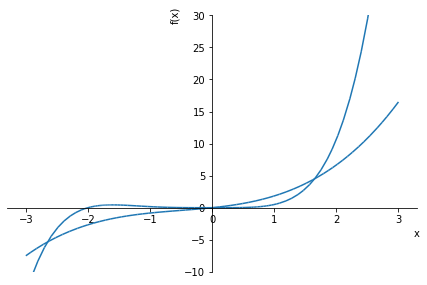

In [8]:
import sympy
from sympy import *
import numpy as np

x, y, f1, f2, if1, if2, fsum, fmul = symbols('x y f1 f2 if1 if2 fsum fmul')
pdf1, pdf2 = symbols('pdf1 pdf2')

f1 = x ** 2
f2 = x + 1

if1 = integrate(f1)
if2 = integrate(f2)

fsum = if1 + if2
fmul = if1 * if2

from sympy.plotting import plot

p1 = plot(fsum, (x, -3, 3), ylim=(-10, 30), show=False)
p2 = plot(fmul, (x, -3, 3), ylim=(-10, 30), show=False)

p1.extend(p2)

p1.show()

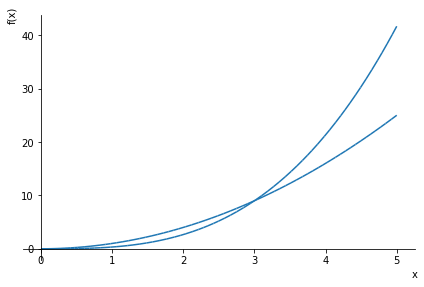

analytical result :  9
without importance result :  9.073663103686496
with importance result :  9.009597083856262


In [47]:
# Monte Carlo basics

from sympy import *
from sympy.stats import *
import numpy as np

x, y, z, f1, f2 = symbols('x y z f1 f2')

# Surpose f1 is a function hard to integrate
f1 = x ** 2
integrated_f1 = integrate(f1)
p1 = plot(integrated_f1, (x, 0, 5), show=False)
p2 = plot(f1, (x, 0, 5), show=False)
p1.extend(p2)
p1.show()

print('analytical result : ', integrated_f1.subs(x, 3))

# Use Monte Carlo to evaluate integrate(x**2) in region (0, 3)

## Generate uniform samples
uniform_samples = np.random.uniform(0, 1, 10000)

## Without importance sampling
lambda_f1 = lambdify(x, f1, 'numpy')
result_samples = lambda_f1(uniform_samples * 3)
result = np.average(result_samples) * 3
print('without importance result : ', result)

## With importance sampling
### Three different pdf function to compare
pdf1, pdf2, pdf3 = symbols('pdf1 pdf2 pdf3')
### pdf must integrate to 1 in the dest region
pdf1 = 1 / 3
pdf2 = 2 * x / 9
pdf3 = x ** 2 / 9
cdf2 = integrate(pdf2)
cdf3 = integrate(pdf3)

### Currently havn't found any method to get the inversion
cdf2_inv = Pow(x * 9, 1 / 2)
cdf3_inv = Pow(x * 27, 1 / 3)

### Get customized distribution of samples
lambda_pdf = lambdify(x, cdf2_inv, 'numpy')
pdf_samples = lambda_pdf(uniform_samples)
lambda_est = lambdify(x, f1 / pdf2, 'numpy')
result_samples2 = lambda_est(pdf_samples)
result2 = np.average(result_samples2)
print('with importance result : ', result2)